<a href="https://colab.research.google.com/github/valesierrai/Aprendizaje-No-Supervisado-para-el-AD/blob/main/Reto_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**0. Cargamos Librerias**

In [ ]:
!pip install googletrans==4.0.0-rc1
!pip install language-tool-python
!pip install translate
!pip install unidecode
!pip install pyLDAvis

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=86b6a36784c3eb78d72b48190a6c47b8bc73852ba129cb7d124d2e11d9d3fe3e
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:


In [ ]:
from google.colab import drive # conectar con datos de drive
drive.mount('/content/drive')
from googletrans import Translator
import language_tool_python
import pandas as pd # manejo de data frame
import numpy as np # manejos matriciales
import nltk # paquete 1 de lenguaje natural
import plotly.express as px # graficos
import spacy # paquete 2 de lenguaje natural
import re # paquete 2 de lenguaje natural
from collections import Counter
from textblob import TextBlob  #
from unidecode import unidecode
import seaborn as sns # graficos
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords # conjunto de stopwords
from nltk.tokenize import TweetTokenizer # tokenizador de tweet
from nltk.stem import PorterStemmer # hacer steming palabras
from nltk.stem import LancasterStemmer # hacer steming palabras
from nltk.stem import WordNetLemmatizer # extraer el lema de una palabra
import matplotlib.pyplot as plt
from transformers import pipeline
from wordcloud import WordCloud  # graficos de palabras
from transformers import MarianMTModel, MarianTokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
# from translate import Translator
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import (KMeans, AgglomerativeClustering, DBSCAN)
from sklearn.decomposition import PCA # Análisis de componentes principales
from scipy.cluster.hierarchy import dendrogram,  linkage # Dendograma
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min

Mounted at /content/drive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


#**1. Cargamos la Base de Datos**

In [ ]:
datos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje No Supervisado/realdonaldtrump.csv')
datos.head()

In [ ]:
datos_muestra=datos.sample(1000, random_state=1001367697)
datos_muestra.head()

,id,link,content,date,retweets,favorites,mentions,hashtags
31965,877353797760286720,https://twitter.com/realDonaldTrump/status/877...,"Thank you @ FoxNews ""Huge win for President Tr...",2017-06-20 21:33:40,15228,78859,@FoxNews,NaN
10642,360790379806732289,https://twitter.com/realDonaldTrump/status/360...,# TrumpVine A message for @ AnthonyWeiner- htt...,2013-07-26 10:55:04,189,117,@AnthonyWeiner,NaN
5753,292329869096914945,https://twitter.com/realDonaldTrump/status/292...,@ lcf42 @ Deadspin They are total losers.,2013-01-18 11:57:26,15,8,@Deadspin,NaN
31757,860637673744195584,https://twitter.com/realDonaldTrump/status/860...,Why is it that the Fake News rarely reports Oc...,2017-05-05 18:29:45,11939,55354,NaN,NaN
23740,617522139646816256,https://twitter.com/realDonaldTrump/status/617...,""" @ eastonelliott22: @ _Tsac_ More than half o...",2015-07-04 21:35:25,230,581,@eastonelliott22,NaN


In [ ]:
datos_muestra.columns

Index(['id', 'link', 'content', 'date', 'retweets', 'favorites', 'mentions',
       'hashtags'],
      dtype='object')

#**2. Análisis de Sentimientos**

In [ ]:
sia = SentimentIntensityAnalyzer() # Definimos el algoritmo base
def analisis_sentimiento(texto):
  """
  Recibe un texto
  Retorna el sentimiento del texto, negativo, positivo, neutral
  """
  sentimiento = sia.polarity_scores(texto)['compound']  # Devuelve un diccionario con los resultados
  if sentimiento >0:
    etiqueta= "positivo"
  elif sentimiento <0:
    etiqueta= "negativo"
  else:
    etiqueta= "neutral"
  return etiqueta

In [ ]:
datos_muestra["sentimiento"]=datos_muestra["content"].apply(analisis_sentimiento)

In [ ]:
datos_muestra["sentimiento"].value_counts()

,count
sentimiento,
positivo,571
negativo,257
neutral,172


In [ ]:
tabla_frecuencia_relacion = datos_muestra.groupby("content")["sentimiento"].value_counts(normalize=True)
tabla_frecuencia_relacion

,,proportion
content,sentimiento,
""" @ 123Jayne: That's our President! That's why we need you to run in 2016! I know you would never waste our money! President Trump""",positivo,1.0
""" @ 1986Fed: Obama needs to listen to @ realDonaldTrump so we can turn things around economically !!"" So true, and it would be sooooo easy!",positivo,1.0
""" @ 1Barbara1: @ realDonaldTrump @ SteveMarz1 @Felix_Clay @ kpdelbridge @ seanhannity Vietnam Veterans Against McCain-https://youtu.be/vFM1xqqTX_g """,neutral,1.0
""" @ 1HotNinja: @ realDonaldTrump Please run for president, it would be my dream come true. No better person to run U.S.A.""",positivo,1.0
""" @ 1MuskyHunter: @ realDonaldTrump @ suzannesaxx love this guy - no fake account, spread the word # trumpforprez""",negativo,1.0
...,...,...
"“The U.S. Created 263,000 Jobs in April, Unemployment Fell to Lowest Level Since 1969”https://www.breitbart.com/economy/2019/05/03/the-u-s-created-263000-jobs-in-april/ …",negativo,1.0
"“There is no bribery, or any crime at all, alleged in the Articles of Impeachment. This is a first in the history of our Country.” @ JudgeJeanine @ RepMikeJohnson",negativo,1.0
"“There’s no fairness here, if you’re a Democrat or a friend of Hillary you get immunity or off scott free. If you’re connected to Donald Trump, you get people like Robert Mueller & Andrew Weissman, and his team of partisans, coming after you with a vengeance and abusing their....",positivo,1.0


#**3. Entidades**

¿Es necesario el reconocimiento de entidades?

¿cuáles serían las entidades que se podrían considerar?


### Entidades Reconocidas por `spacy.load("en_core_web_sm")`:

1. **PERSON**: Personas, figuras famosas o personajes ficticios.
   - Ejemplo: "Barack Obama", "Harry Potter".

2. **NORP**: Grupos étnicos, religiosos o políticos.
   - Ejemplo: "American", "Christian", "Communist".

3. **FAC**: Edificios, aeropuertos, carreteras, puentes, etc.
   - Ejemplo: "Eiffel Tower", "Wall Street".

4. **ORG**: Organizaciones, incluyendo compañías, agencias gubernamentales, instituciones.
   - Ejemplo: "Google", "United Nations", "NASA".

5. **GPE**: Países, ciudades o estados.
   - Ejemplo: "France", "New York", "California".

6. **LOC**: Lugares no geopolíticos (montañas, ríos, regiones).
   - Ejemplo: "Mount Everest", "Sahara Desert".

7. **PRODUCT**: Productos o bienes tangibles (objetos físicos).
   - Ejemplo: "iPhone", "Ford Mustang".

8. **EVENT**: Eventos nombrados, incluyendo guerras, concursos deportivos, desastres, etc.
   - Ejemplo: "World War II", "Super Bowl", "Olympics".

9. **WORK_OF_ART**: Títulos de obras de arte, libros, canciones, películas, etc.
   - Ejemplo: "The Mona Lisa", "Inception", "Bohemian Rhapsody".

10. **LAW**: Documentos legales nombrados.
   - Ejemplo: "Constitution", "The Magna Carta".

11. **LANGUAGE**: Idiomas.
   - Ejemplo: "English", "Spanish", "Mandarin".

12. **DATE**: Fechas, períodos de tiempo o cualquier expresión de tiempo.
   - Ejemplo: "June 25, 2023", "next Monday", "two weeks".

13. **TIME**: Tiempos dentro del día.
   - Ejemplo: "2:30 PM", "midnight", "morning".

14. **PERCENT**: Porcentajes.
   - Ejemplo: "50%", "20 percent".

15. **MONEY**: Cantidades monetarias.
   - Ejemplo: "$100", "500 euros", "10 dollars".

16. **QUANTITY**: Cantidades de unidades.
   - Ejemplo: "10 kilograms", "5 liters", "several meters".

17. **ORDINAL**: Números ordinales.
   - Ejemplo: "first", "second", "third".

18. **CARDINAL**: Números cardinales que no caen bajo otra categoría.
   - Ejemplo: "one", "two", "100"

In [ ]:
nlp = spacy.load("en_core_web_sm") # lectura del modelo
def extraer_entidades(texto):
  """
  Por cada noticia vamos a extraer las entidades de PERSON, NORP, ORG, GPE, DATE
  Retorna un texto con las entidades separadas por ,
  """
  doc = nlp(texto) # aplicamos el algoritmo
  entidades=[] # entidades
  for ent in doc.ents:
    if ent.label_  in ["PERSON", "NORP", "ORG", "GPE", "DATE"]:
      entidades.append(ent.text) # añadimos a la lista
  entidades=','.join(entidades) # unimos la lista por comas
  entidades=entidades.lower() # todo a minúsculas
  return entidades

In [ ]:
datos_muestra["entidades"] = datos_muestra["content"].apply(extraer_entidades)

In [ ]:
join_text = ",".join(datos_muestra["entidades"])
pd.Series(join_text.split(",")).value_counts().iloc[0:20]

,count
,237
trump,47
today,35
obama,32
u.s.,23
democrats,23
donald trump,22
america,22
china,20
american,15


# **4. Limpieza**

In [ ]:
stop_words_nltk_en =list(set(stopwords.words('english')))
stop_words_nltk_en =["b", "u", "w", "th", "com", "g", *stop_words_nltk_en] #Agregamos más stop_words que encontramos en la nube de palabras
def texto_limpio(texto):
  """
  Recibe un texto
  Retorna un texto sin simbolos, sin stopwords, en minusculas
  """
  texto_limpio=str(texto).lower() #Pasamos a minusculas
  # blob = TextBlob(texto_limpio )
  # texto_limpio= blob.correct().string
  texto_limpio = re.sub(r'https?://\S+|www\.\S+', ' ', texto_limpio) # Eliminar URL
  texto_limpio= re.sub(r"[^A-Za-z]+",' ',texto_limpio) # Eliminar simbolos
  texto_limpio = texto_limpio.split() # Seperacion de tokens
  texto_limpio=[w for w in texto_limpio if w not in stop_words_nltk_en] # Eliminacción de stop word
  texto_limpio = " ".join(texto_limpio)
  return texto_limpio

In [ ]:
datos_muestra["texto_limpio"]=datos_muestra["content"].apply(texto_limpio)

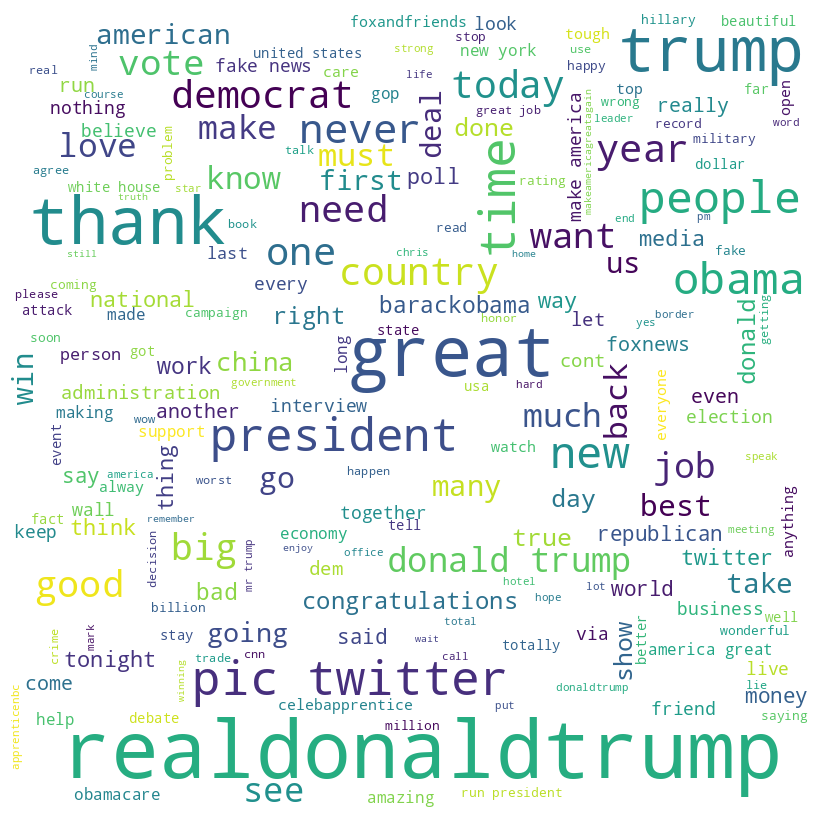

In [ ]:
texto_join =  " ".join(datos_muestra["texto_limpio"])
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(texto_join)
 # mostrar nube de palabras
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# **5. Análisis**

## Gráficos Análisis de Sentimiento y Entidades

Size of new BoW title = 478


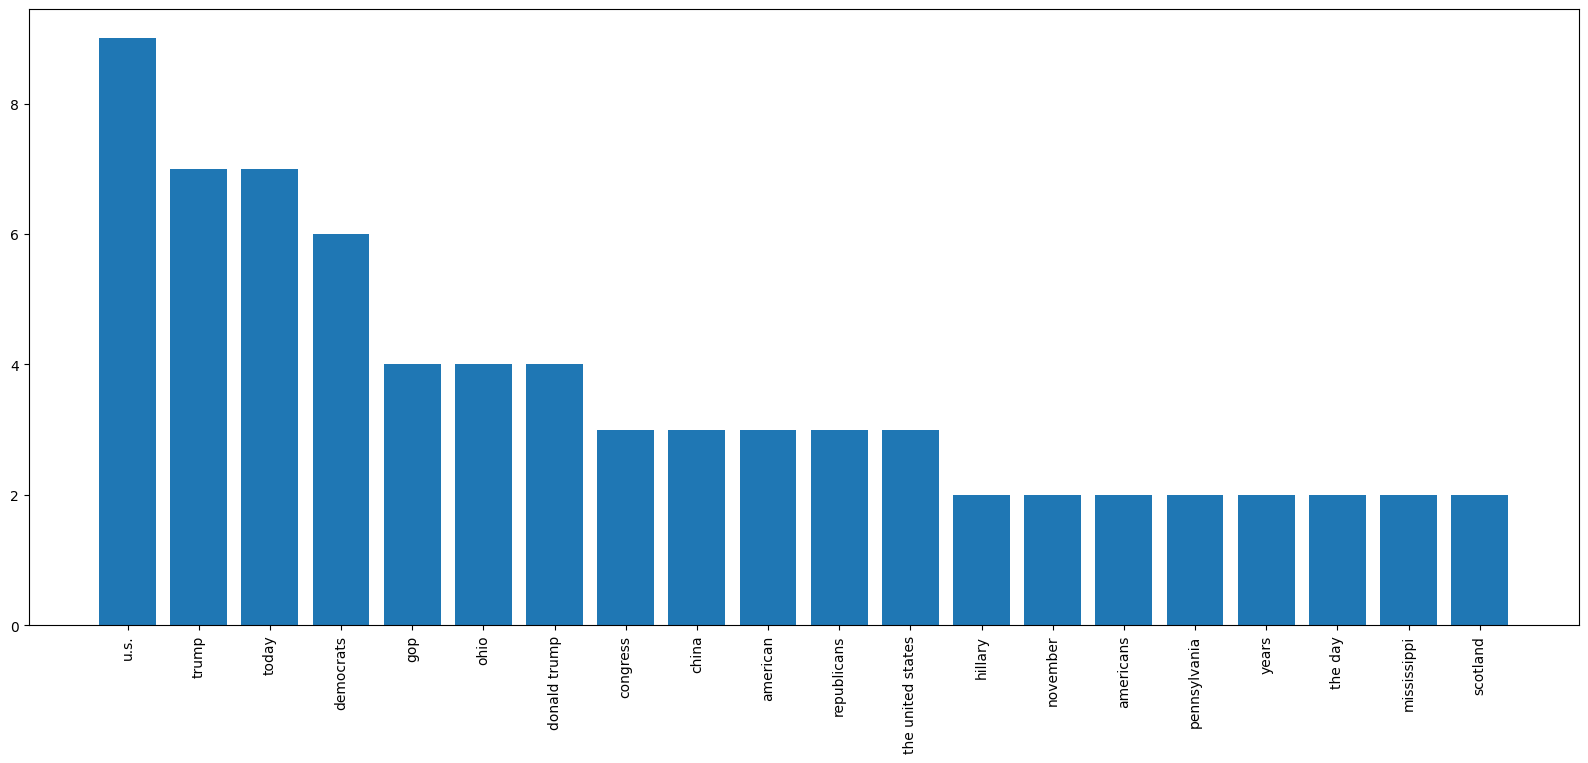

In [ ]:
#Gráfico Sentimiento Positivo
texto_frecuencia = "".join(datos_muestra.loc[datos_muestra["sentimiento"]=="positivo" , "entidades"])
tokens_=nltk.FreqDist(texto_frecuencia.split(","))

fdist = nltk.FreqDist(tokens_)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)

plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Según el gráfico podemos ver que la entidad que tiene un mayor nivel del sentimiento positivo es 'u.s', seguido de 'trump', y 'today'. Asimismo, notamos que también se encuentran 'donald trump' y 'the united states' como entidades con sentimiento postivo, las cuales se refieren a la mismas entidades del principio del gráfico ('u.s' y 'trump'). Asimismo, notamos que existen otras entidades como 'hilary', 'scotland' y 'mississippi' que si bien tienen un sentimiento positivo, este no es tan alto como los mencionado anteriormente.

Size of new BoW title = 241


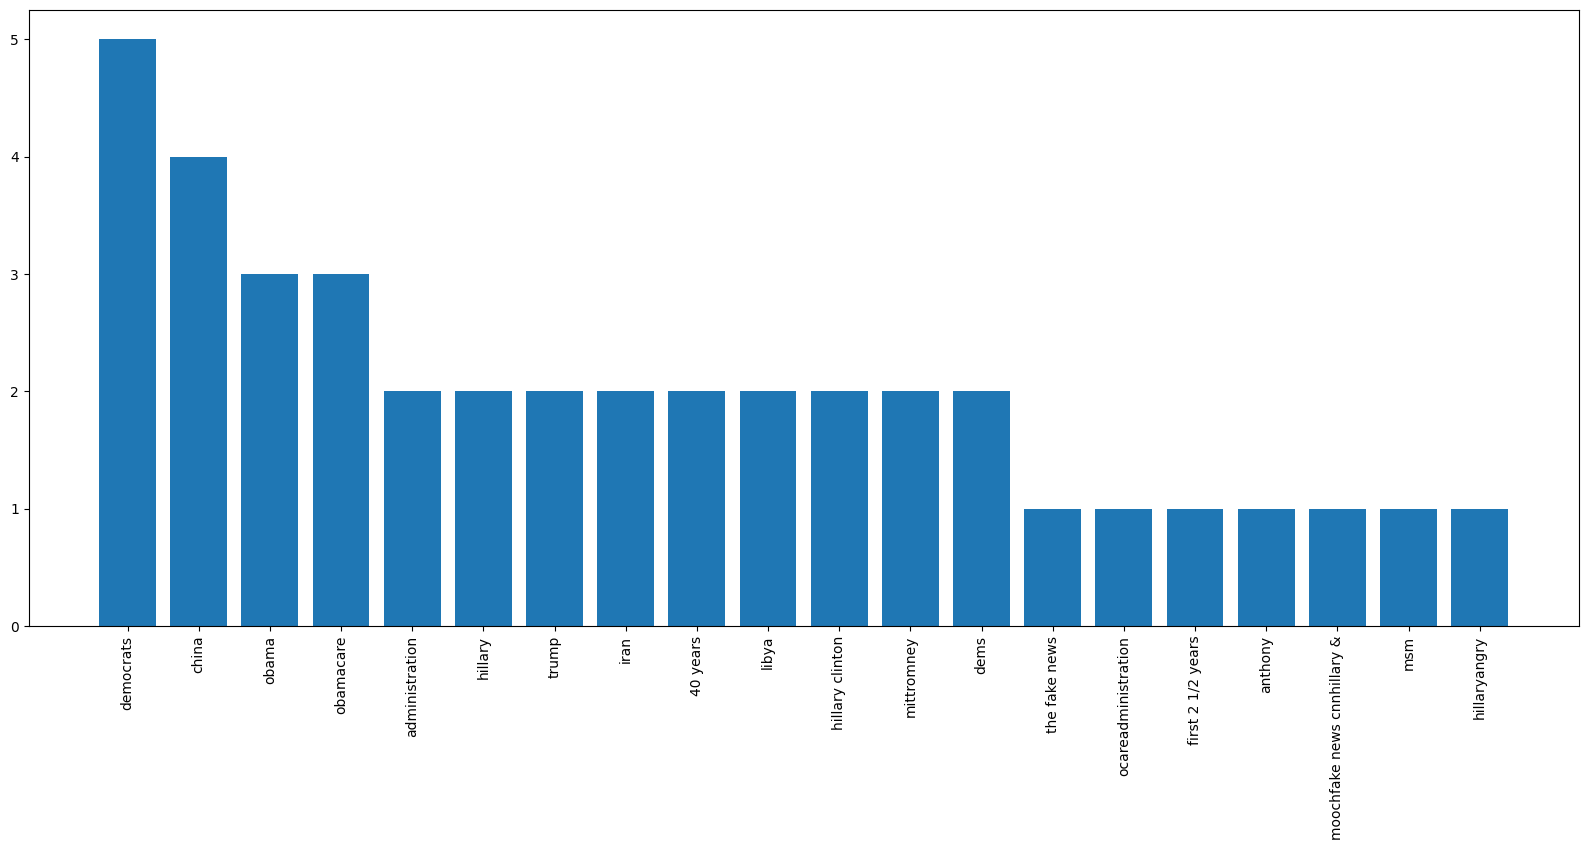

In [ ]:
#Gráfico Sentimiento Negativo
texto_frecuencia = "".join(datos_muestra.loc[datos_muestra["sentimiento"]=="negativo" , "entidades"])
tokens_=nltk.FreqDist(texto_frecuencia.split(","))

fdist = nltk.FreqDist(tokens_)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)

plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Notamos que la entidad que tiene un mayor número de tweets con sentimiento negativo es 'democrats', seguido de 'china'. Por otro lado, notamos nombres de figuras políticas como 'obama', 'hilary' y 'trump' dentro de las entidades más usadas con sentimiento negativo.

Size of new BoW title = 88


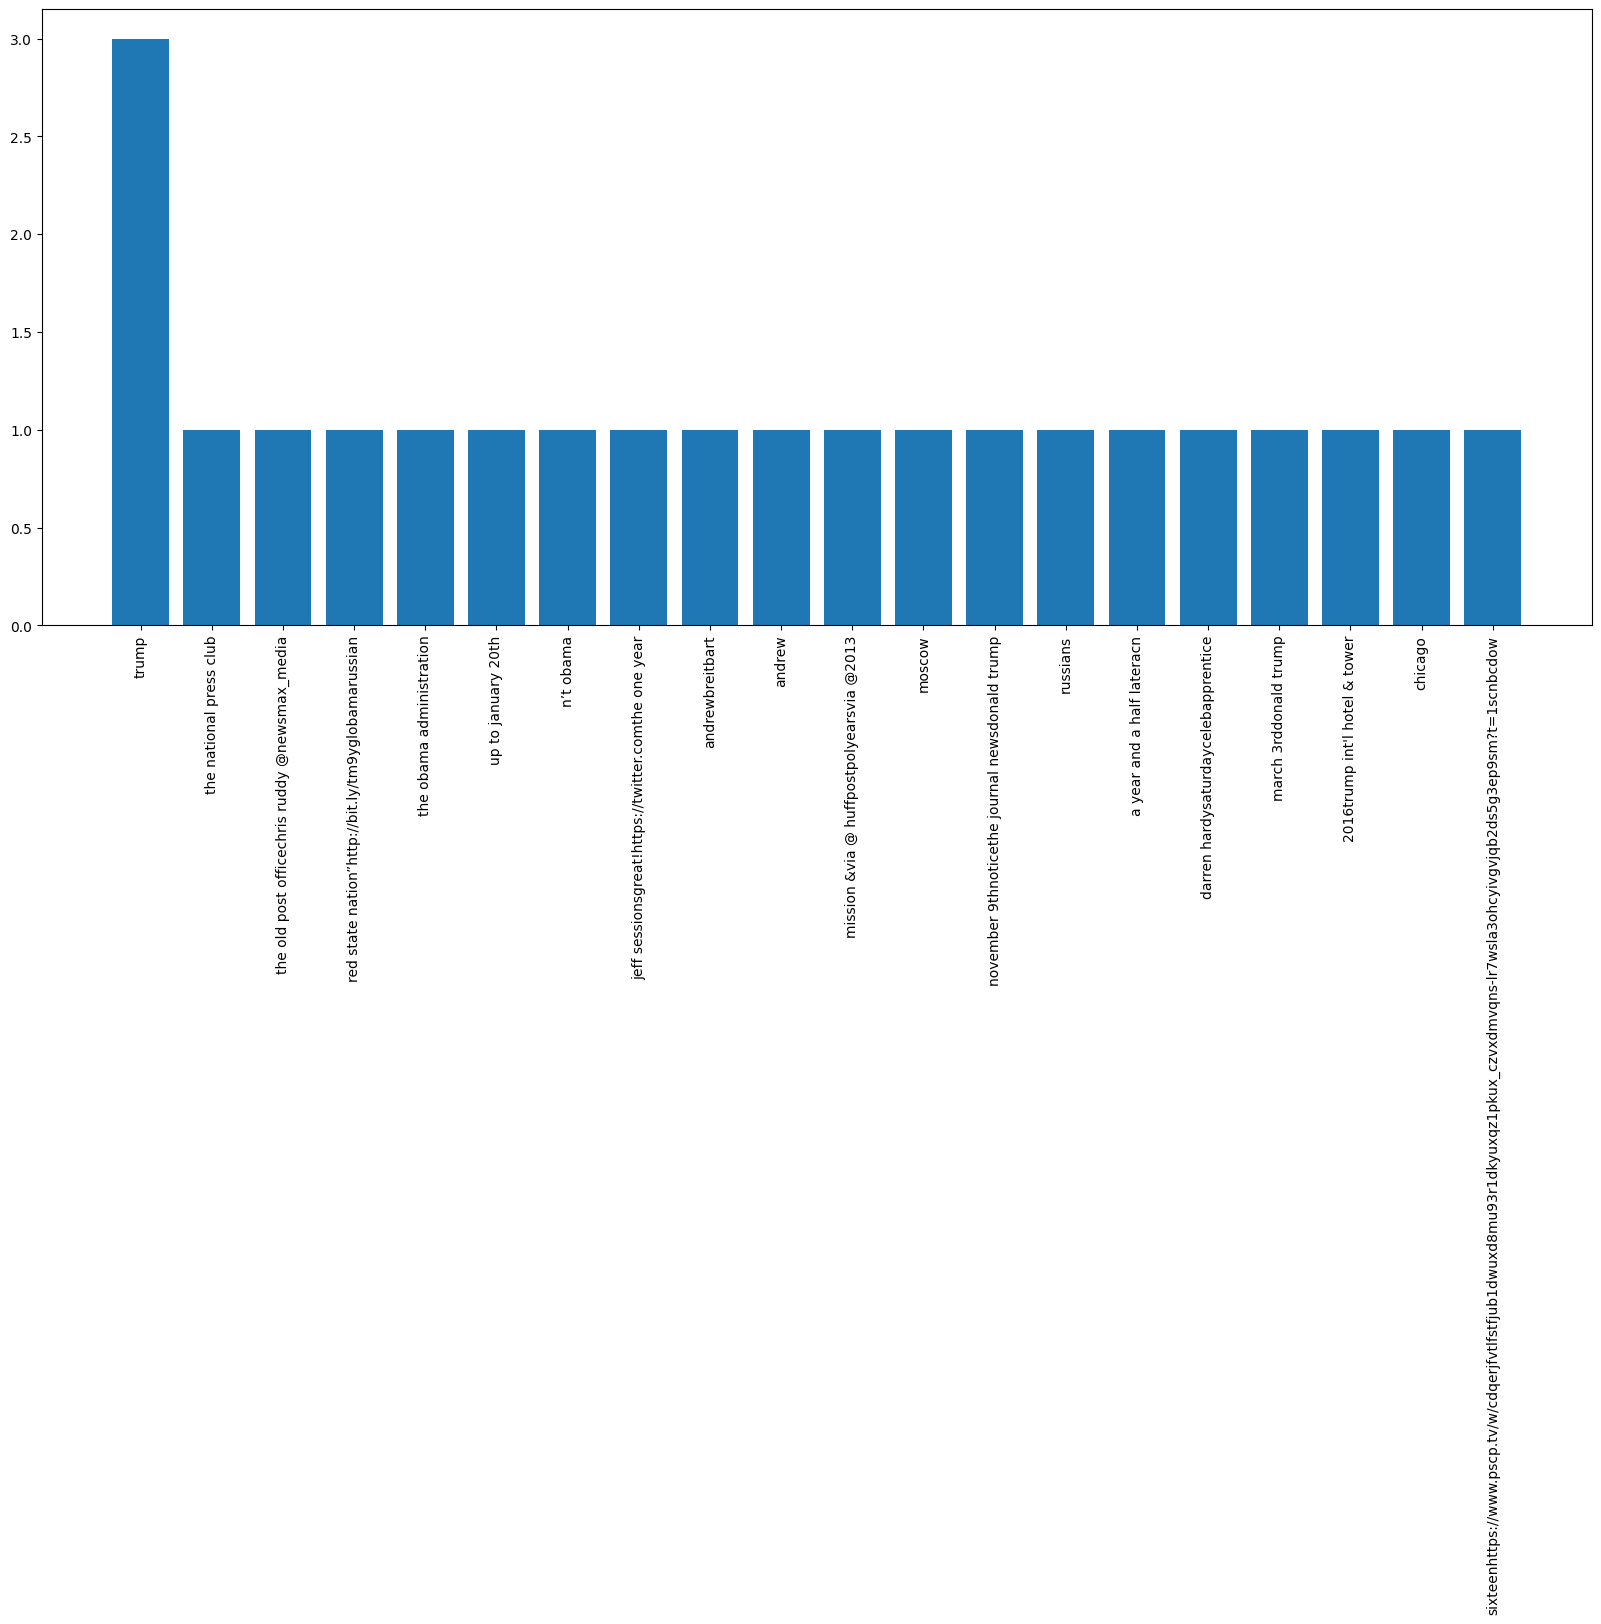

In [ ]:
#Gráfico Sentimiento Neutral
texto_frecuencia = "".join(datos_muestra.loc[datos_muestra["sentimiento"]=="neutral" , "entidades"])
tokens_=nltk.FreqDist(texto_frecuencia.split(","))

fdist = nltk.FreqDist(tokens_)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)

plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Lo primero que notamos es que hubo algo en la limpieza de datos que no funcionó porque hay 3 entidades que contienen URL, aunque esto puede deberse a que los URL están pegados a la palabra anterior. Por otro lado, vemos que 'trump' también aparece en este sentimiento, sin embargo a diferencia de los otros dos en este caso aparece de primero, y se encuentra muy por encima del resto de entidades que tenemos en este sentimiento. En este sentimiento, encontramos que entre las entidades neutrales se encuentran 'andrew', 'russians', y 'moscow'.

## Gráfico de Frecuencias de la columna Texto Limpio

Size of new BoW title = 4138


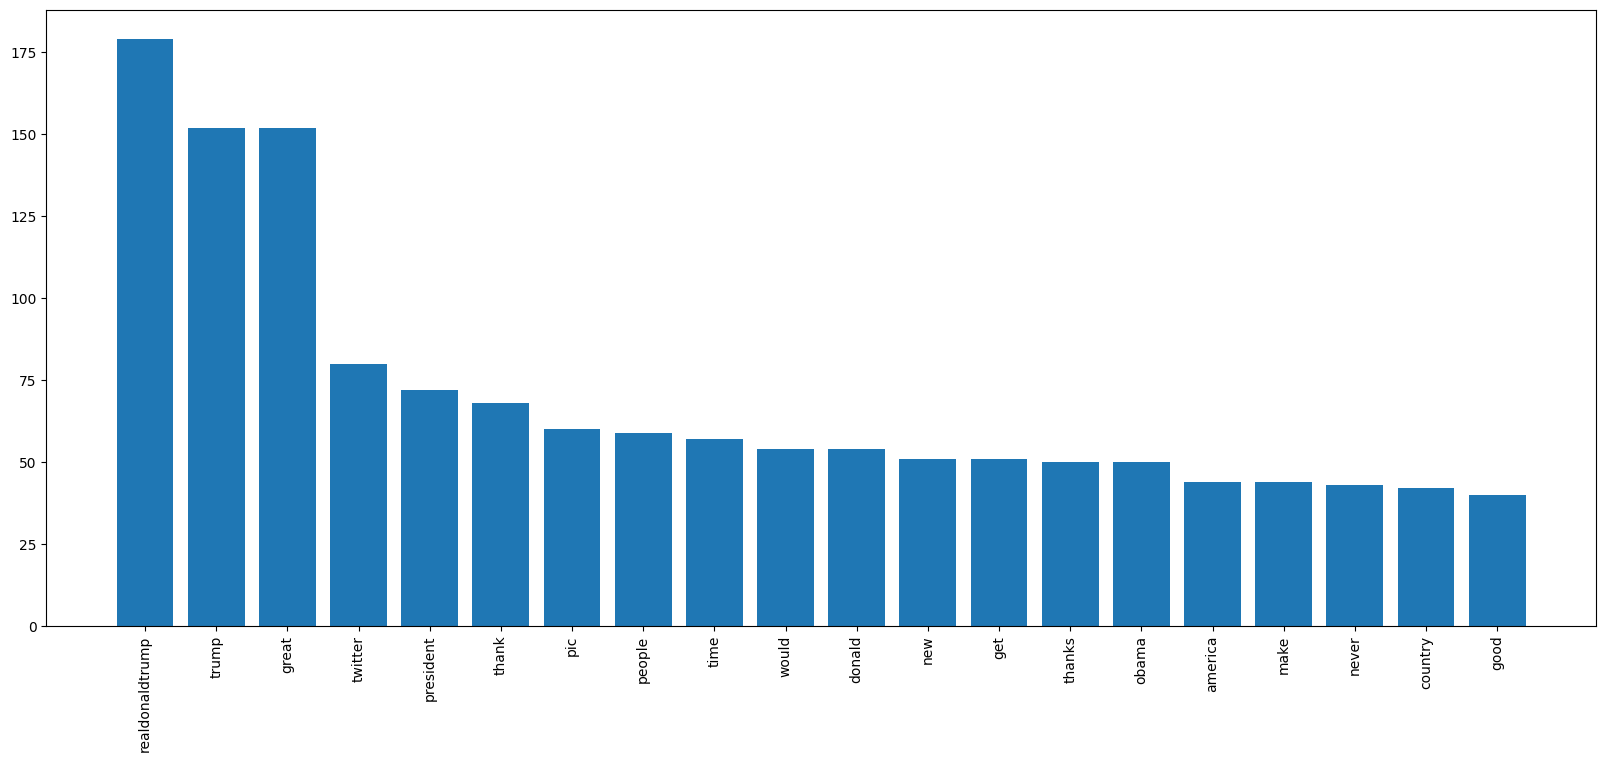

In [ ]:
texto_frecuencia =  " ".join(datos_muestra["texto_limpio"])
tokens_=nltk.FreqDist(   texto_frecuencia.split() )

fdist = nltk.FreqDist(tokens_)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)

plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Con base al gráfico podemos observar que el tema principal con base a los datos de la muestra es trump (lo que ya sabíamos pues de esto es la base de datos, sin embargo, lo corroboramos al notar que su nombre es lo que más se repite, ocupando las dos primeras barras del gráfico). Asimismo, se puede notar que el mayor furor de los tweets seleccionados es sin duda alguna el ambiente político de los Estados Unidos, ya que en el gráfico se encuentran palabras como president, america, obama, donald, y country (no ignorando que esta última puede tratarse de cualquier otro país). Por otro lado, great es una palabra muy repetida en los tweets de la base de datos, pero, realmente no nos da mucha información de lo que podría o no haber en el tweet.Lo mismo sucede con palabras como get, new y make. Ahora, también es evidente que en el gráfico tenemos tanto thank como thanks, que basicamente podrían simplemente incluirse como una sola, pues significan lo mismo, pero la 's' en una de ellas hace que esté en otra barra del gráfico.

## Relación Sentimiento con los retweets y favorites

Para hacer el análisis utilizaremos intervalos

###**Retweets**

In [ ]:
#Se calcula el rango
rango = datos_muestra["retweets"].max() - datos_muestra["retweets"].min()
rango

187335

In [ ]:
#Número de Intervalos (regla de Sturges)
K = 1 + np.log2(len(datos_muestra["retweets"]))
K

10.965784284662087

Lo aproximamos a 11

In [ ]:
#Amplitud
A = rango/11
A

17030.454545454544

In [ ]:
#Se crea la columna dentro de la base de datos con base a lo que calculamos anteriormente para poder sacar los intervalos adecuados
bins = np.arange(datos_muestra["retweets"].min(), datos_muestra["retweets"].max() + A, A)
bins
datos_muestra["retweets_intervalos"] = pd.cut(datos_muestra["retweets"], bins=bins)

In [ ]:
datos_muestra["retweets_intervalos"].value_counts()

,count
retweets_intervalos,
"(0.0, 17030.455]",847
"(17030.455, 34060.909]",114
"(34060.909, 51091.364]",24
"(51091.364, 68121.818]",3
"(68121.818, 85152.273]",3
"(102182.727, 119213.182]",1
"(170304.545, 187335.0]",1
"(85152.273, 102182.727]",0
"(119213.182, 136243.636]",0


Ya teniendo los intervalos de 'Retweet' hacemos el análisis con los sentimientos, teniendo en cuenta que 4 intervalos no nos van a arrojar resultados puesto que están vacios

<ipython-input-120-2e5c41b9147d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_frecuencia_relacion = datos_muestra.groupby('retweets_intervalos')['sentimiento'].value_counts(normalize=True)


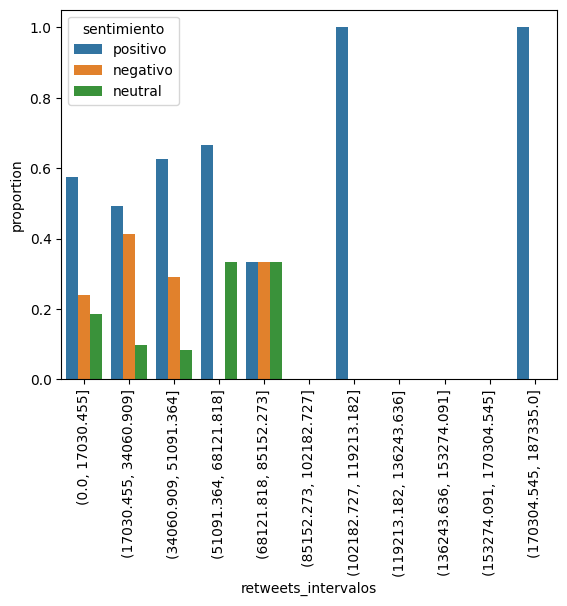

In [ ]:
#Sentimiento con Retweets
tabla_frecuencia_relacion = datos_muestra.groupby('retweets_intervalos')['sentimiento'].value_counts(normalize=True)
sns.barplot(data = tabla_frecuencia_relacion.reset_index(), x = 'retweets_intervalos', y = 'proportion', hue = 'sentimiento')
plt.xticks(rotation=90)
plt.show()

Aquí notamos que en los (102182.727, 119213.182] y (170304.545, 187335.0], en los cuales solo hay un dato, predomina en sentimiento positivo. De la misma forma este es el sentimiento dominante en la mayoria de los intervalos organizados. Por otro lado, en el intervalo (68121.818, 85152.273], vemos que cada uno de los retweets contenidos aca, tienen un sentimiento diferente, y es por eso que las tres barras están al mismo nivel. Ahora, en (0.0, 17030.455],
(17030.455, 34060.909], y (34060.909, 51091.364] si bien predomina el sentimiento positivo, el negativo es el que le sigue de cerca, dejando muy atrás el neutral.

###**Favorites**

In [ ]:
#Se calcula el rango
rango1 = datos_muestra["favorites"].max() - datos_muestra["favorites"].min()
rango1

698445

In [ ]:
#Número de Intervalos (regla de Sturges)
K1 = 1 + np.log2(len(datos_muestra["favorites"]))
K1

10.965784284662087

Se aproxima a 11

In [ ]:
#Amplitud
A1 = rango1/11
A1

63495.0

In [ ]:
#Se crea la columna dentro de la base de datos con base a lo que calculamos anteriormente para poder sacar los intervalos adecuados
bins1 = np.arange(datos_muestra["favorites"].min(), datos_muestra["favorites"].max() + A1, A1)
bins1
datos_muestra["favorites_intervalos"] = pd.cut(datos_muestra["favorites"], bins=bins1)

In [ ]:
datos_muestra["favorites_intervalos"].value_counts()

,count
favorites_intervalos,
"(0.0, 63495.0]",796
"(63495.0, 126990.0]",145
"(126990.0, 190485.0]",32
"(190485.0, 253980.0]",8
"(253980.0, 317475.0]",3
"(571455.0, 634950.0]",1
"(634950.0, 698445.0]",1
"(317475.0, 380970.0]",0
"(380970.0, 444465.0]",0


<ipython-input-129-1f056c7d6492>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_frecuencia_relacion1 = datos_muestra.groupby('favorites_intervalos')['sentimiento'].value_counts(normalize=True)


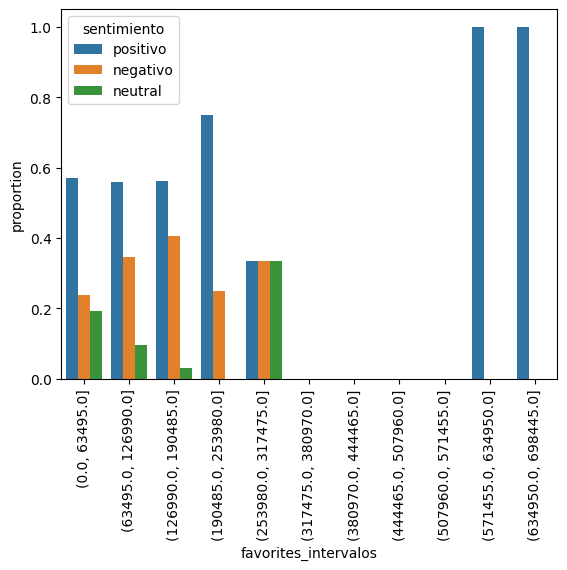

In [ ]:
#Sentimiento con Retweets
tabla_frecuencia_relacion1 = datos_muestra.groupby('favorites_intervalos')['sentimiento'].value_counts(normalize=True)
sns.barplot(data = tabla_frecuencia_relacion1.reset_index(), x = 'favorites_intervalos', y = 'proportion', hue = 'sentimiento')
plt.xticks(rotation=90)
plt.show()

De acuerdo al gráfico podemos ver que predomina el sentimiento positivo en los favorites de los tweets; especialmente en este intervalo (190485.0, 253980.0], puesto que estos dos (571455.0, 634950.0] y (634950.0, 698445.0] a pesar de ser los más altos solo contienen un dato. Ahora, los favorites en el intervalo (0.0, 63495.0], tienen en su mayoria sentimiento positivo como expuesto anteriormente, pero en este caso el sentimiento negativo y neutral están muy cerca del uno del otro a diferencia del resto de intervalos. En el caso del (253980.0, 317475.0] pasa que al solo tener tres datos parece que cada uno arroja un sentimiento diferente y es por esto que se muestran parejos en la gráfica.